Progetto BUSINESS INTELLIGENCE PER I SERVIZI FINANZIARI 
Appello 19/07/2024 

Riccardo Savio 885955

Stocks scelte:

- Info Tech
    - NVDA
    - QCOM

- Healthcare
    - UNH
    - JNJ

- Utilities 
    - NEE
    - SO


### Preparazione Ambiente

Installazione dei moduli richiesti:

pip install numpy
pip install pandas
pip install matplotlib
pip install yfinance


In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import yfinance as yf
from scipy import stats

Scelgo l'intervallo di date per le azioni scelte

In [2]:
start = datetime.datetime(2014, 5, 31)
end = datetime.datetime(2024, 5, 31)

Utilizzando la funzione "download" della libreria yfinance, scarico i dati per ciascuna stock nell'intervallo di date scelte sopra

In [3]:
SP500 = pd.DataFrame(yf.download('^GSPC', start=start, end=end))
NVDA = pd.DataFrame(yf.download('NVDA', start=start, end=end))
QCOM = pd.DataFrame(yf.download('QCOM', start=start, end=end))
UNH = pd.DataFrame(yf.download('UNH', start=start, end=end))
LLY = pd.DataFrame(yf.download('LLY', start=start, end=end))
NEE = pd.DataFrame(yf.download('NEE', start=start, end=end))
SO = pd.DataFrame(yf.download('SO', start=start, end=end))

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Salvo tutti i dataframe in file csv per renderli persistenti

In [4]:
SP500.to_csv('data/SP500.csv')
NVDA.to_csv('data/NVDA.csv')
QCOM.to_csv('data/QCOM.csv')
UNH.to_csv('data/UNH.csv')
LLY.to_csv('data/LLY.csv')
NEE.to_csv('data/NEE.csv')
SO.to_csv('data/SO.csv')

Visualizzo la struttura dei dataframe

In [5]:
print(SP500.columns)
print(NVDA.columns)
print(QCOM.columns)
print(UNH.columns)
print(LLY.columns)
print(NEE.columns)
print(SO.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


Rimuovo tutti i valori nulli dei dataframe

In [6]:
SP500.dropna(inplace=True)
NVDA.dropna(inplace=True)
QCOM.dropna(inplace=True)
UNH.dropna(inplace=True)
LLY.dropna(inplace=True)
NEE.dropna(inplace=True)
SO.dropna(inplace=True)

In [7]:
stocks = [NVDA, QCOM, UNH, LLY, NEE, SO]

Visualizzo i dati delle chiusure aggiustate giornaliere

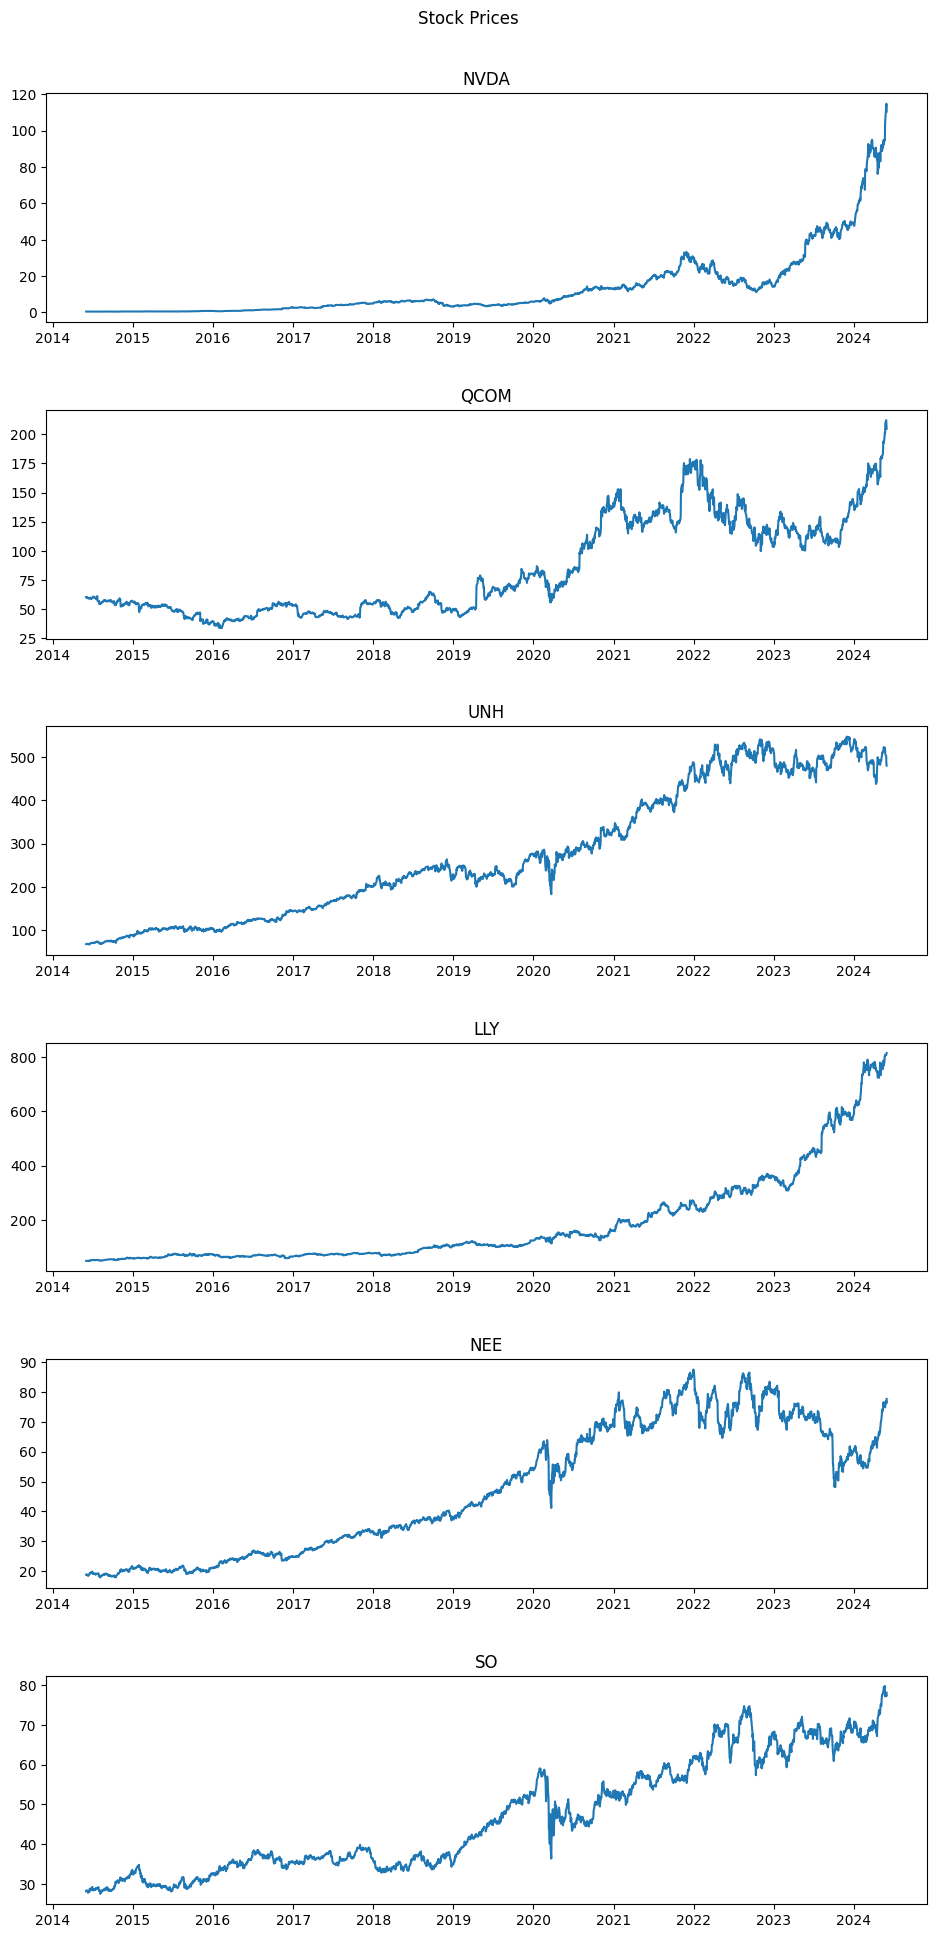

In [8]:
#create 6 subplots
fig, axs = plt.subplots(6, 1, figsize=(10, 20))
fig.suptitle('Stock Prices')

axs[0].plot(NVDA['Adj Close'])
axs[0].set_title('NVDA')

axs[1].plot(QCOM['Adj Close'])
axs[1].set_title('QCOM')

axs[2].plot(UNH['Adj Close'])
axs[2].set_title('UNH')

axs[3].plot(LLY['Adj Close'])
axs[3].set_title('LLY')

axs[4].plot(NEE['Adj Close'])
axs[4].set_title('NEE')

axs[5].plot(SO['Adj Close'])
axs[5].set_title('SO')

plt.tight_layout(pad=3.0)
plt.show()

Calcolo rendimenti semplici lordi, netti e logaritmici 

In [9]:
NVDA['Net Return'] = NVDA['Adj Close'].pct_change()
QCOM['Net Return'] = QCOM['Adj Close'].pct_change()
UNH['Net Return'] = UNH['Adj Close'].pct_change()
LLY['Net Return'] = LLY['Adj Close'].pct_change()
NEE['Net Return'] = NEE['Adj Close'].pct_change()
SO['Net Return'] = SO['Adj Close'].pct_change()

NVDA['Gross Return'] = NVDA['Adj Close']/NVDA['Adj Close'].shift(1)
QCOM['Gross Return'] = QCOM['Adj Close']/QCOM['Adj Close'].shift(1)
UNH['Gross Return'] = UNH['Adj Close']/UNH['Adj Close'].shift(1)
LLY['Gross Return'] = LLY['Adj Close']/LLY['Adj Close'].shift(1)
NEE['Gross Return'] = NEE['Adj Close']/NEE['Adj Close'].shift(1)
SO['Gross Return'] = SO['Adj Close']/SO['Adj Close'].shift(1)

NVDA['Log Return'] = np.log(NVDA['Gross Return'])
QCOM['Log Return'] = np.log(QCOM['Gross Return'])
UNH['Log Return'] = np.log(UNH['Gross Return'])
LLY['Log Return'] = np.log(LLY['Gross Return'])
NEE['Log Return'] = np.log(NEE['Gross Return'])
SO['Log Return'] = np.log(SO['Gross Return'])

NVDA.dropna(inplace=True)
QCOM.dropna(inplace=True)
UNH.dropna(inplace=True)
LLY.dropna(inplace=True)
NEE.dropna(inplace=True)
SO.dropna(inplace=True)

Visualizzo i rendimenti netti, lordi e logaritmici per le singole stock

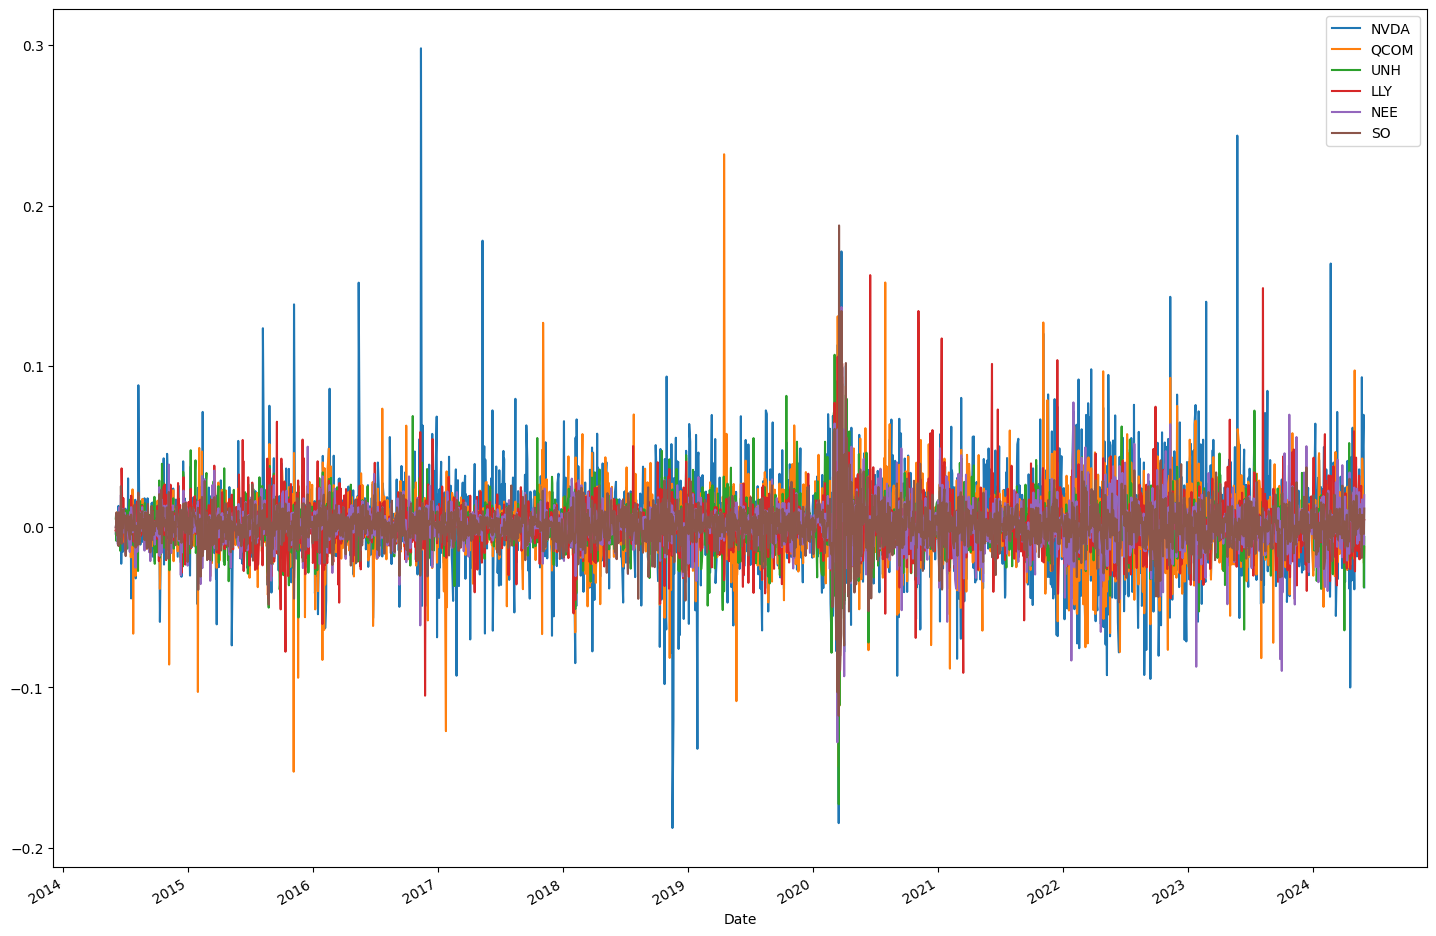

In [10]:
stocks = [NVDA, QCOM, UNH, LLY, NEE, SO]
stocks_tickets = ['NVDA', 'QCOM', 'UNH', 'LLY', 'NEE', 'SO']

df = pd.DataFrame(columns=stocks_tickets)

#add net return column of each stock in df
for stock, stock_ticket in zip(stocks, stocks_tickets):
    df[stock_ticket] = stock['Net Return']

df.plot(figsize=(15,10))   
plt.tight_layout(pad=3.0)
plt.show()

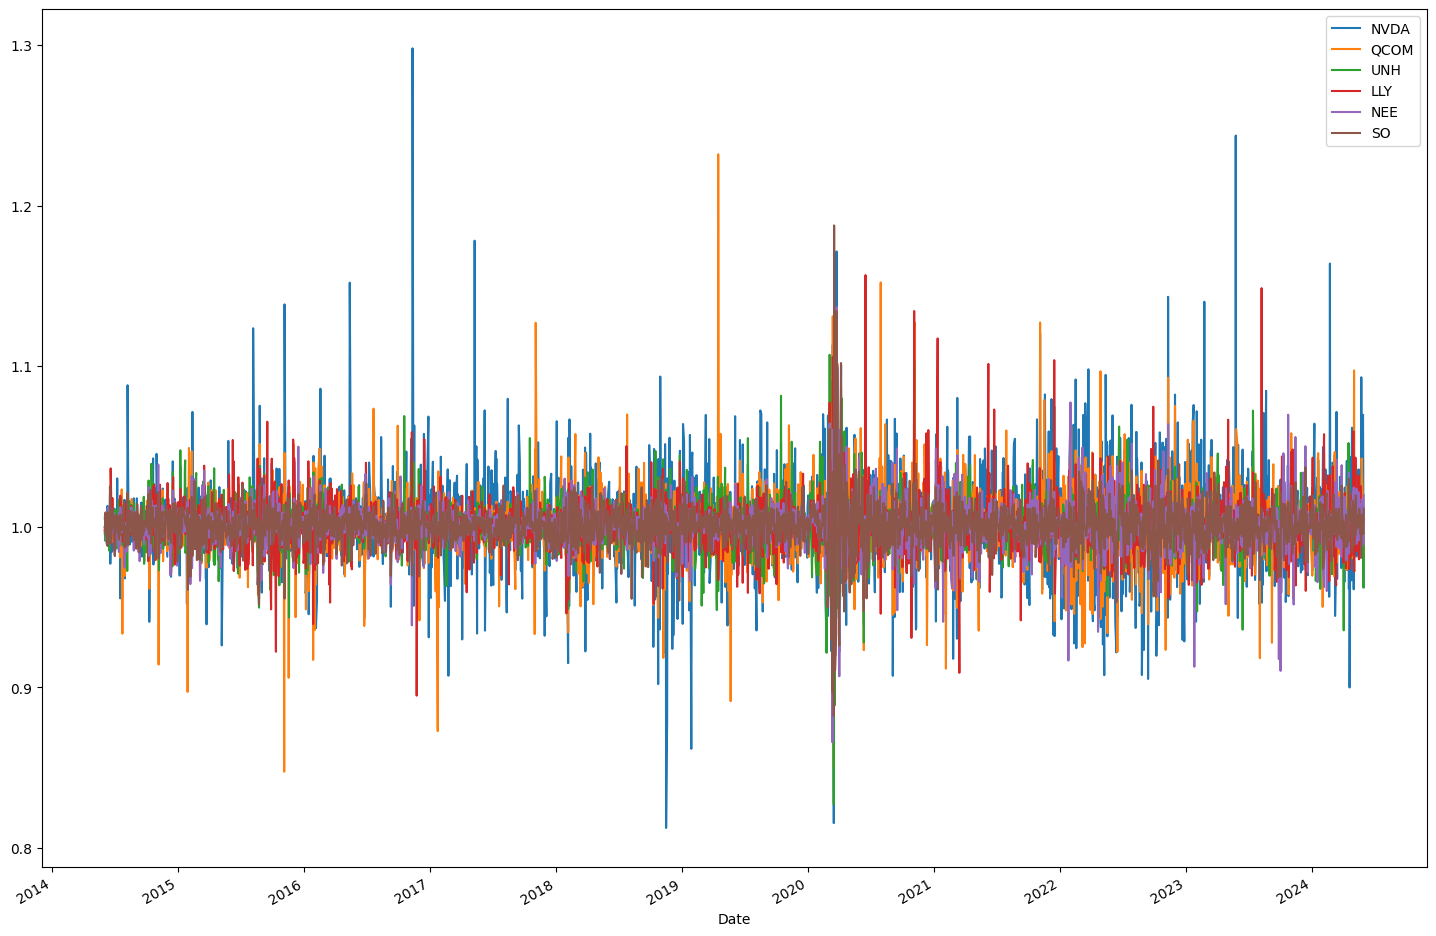

In [11]:
df = pd.DataFrame(columns=stocks_tickets)

#add net return column of each stock in df
for stock, stock_ticket in zip(stocks, stocks_tickets):
    df[stock_ticket] = stock['Gross Return']

df.plot(figsize=(15,10))   
plt.tight_layout(pad=3.0)
plt.show()

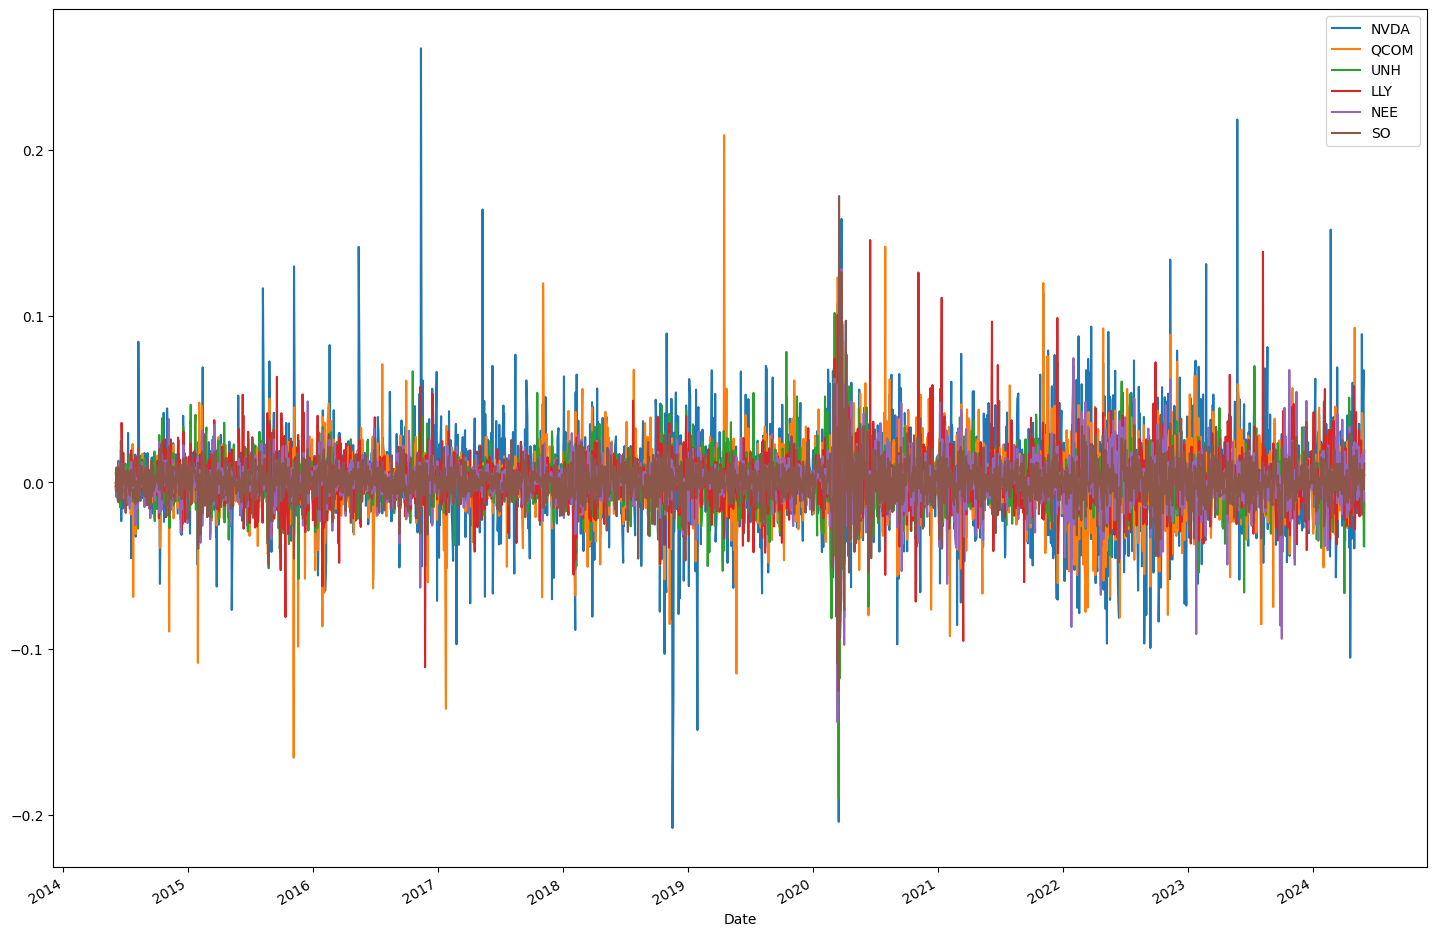

In [12]:
df = pd.DataFrame(columns=stocks_tickets)

#add net return column of each stock in df
for stock, stock_ticket in zip(stocks, stocks_tickets):
    df[stock_ticket] = stock['Log Return']

df.plot(figsize=(15,10))   
plt.tight_layout(pad=3.0)
plt.show()

          NVDA      QCOM
NVDA  1.000000  0.540297
QCOM  0.540297  1.000000


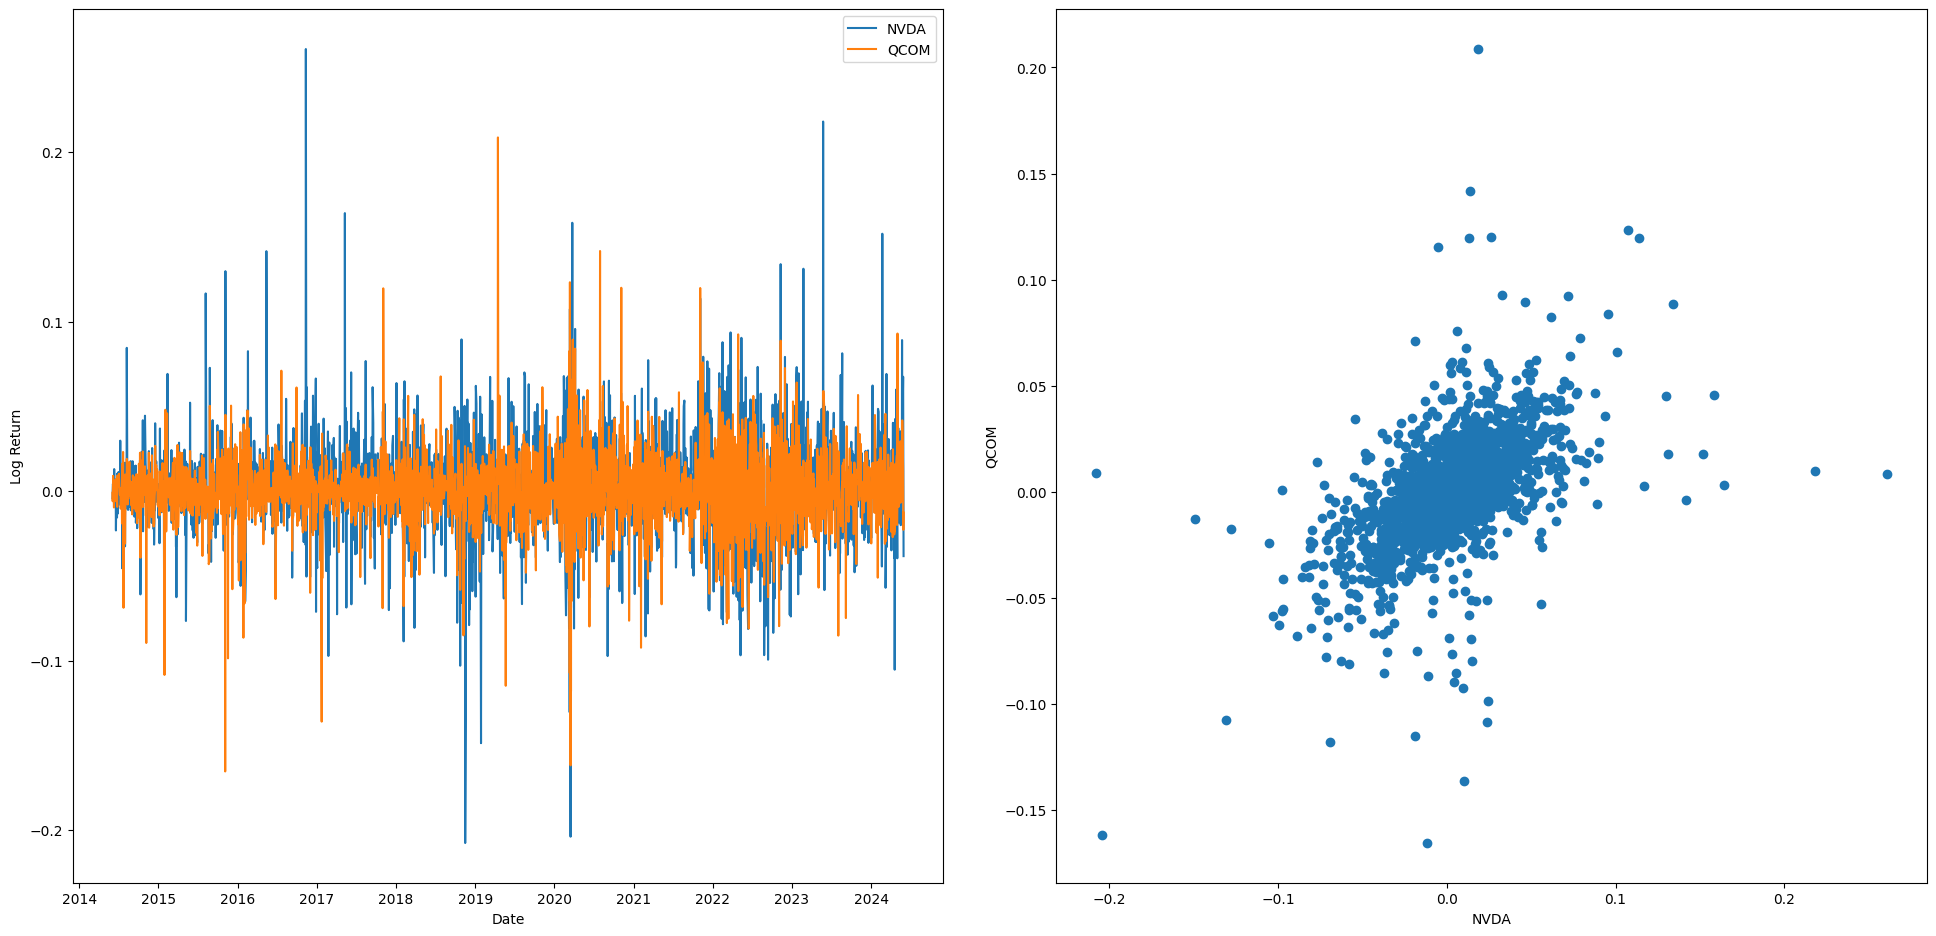

          UNH       LLY
UNH  1.000000  0.402896
LLY  0.402896  1.000000


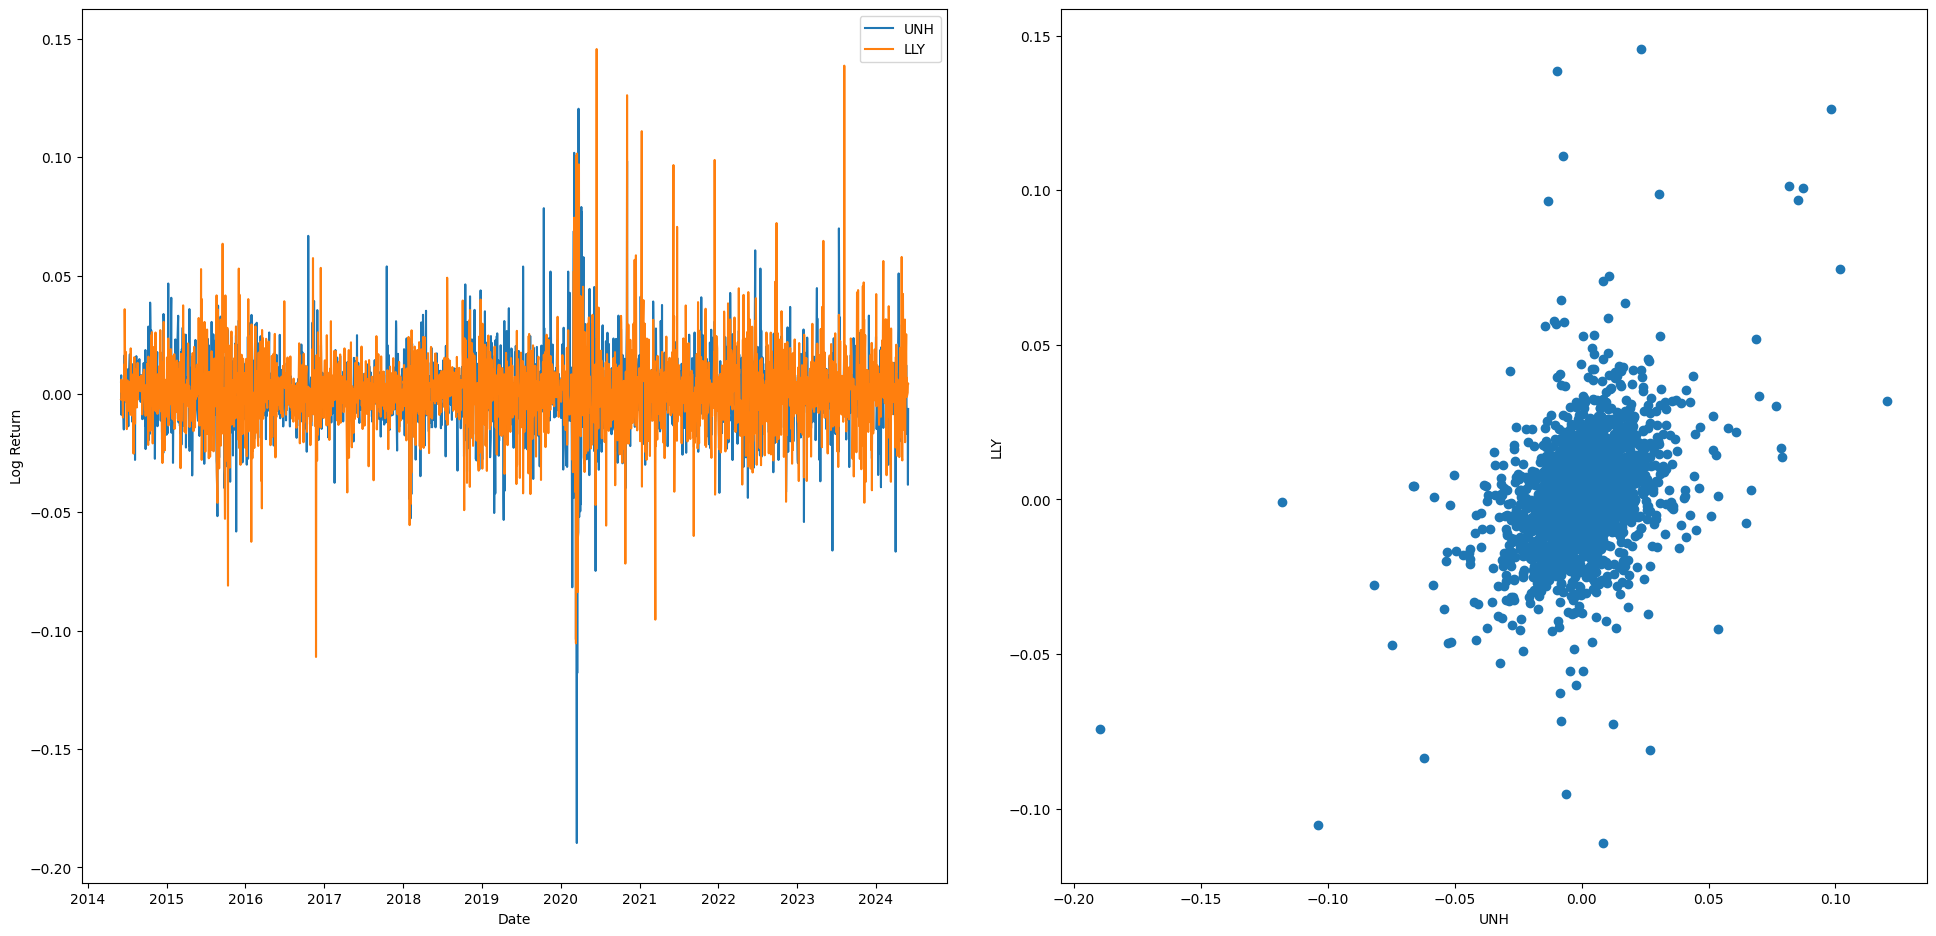

          NEE        SO
NEE  1.000000  0.715323
SO   0.715323  1.000000


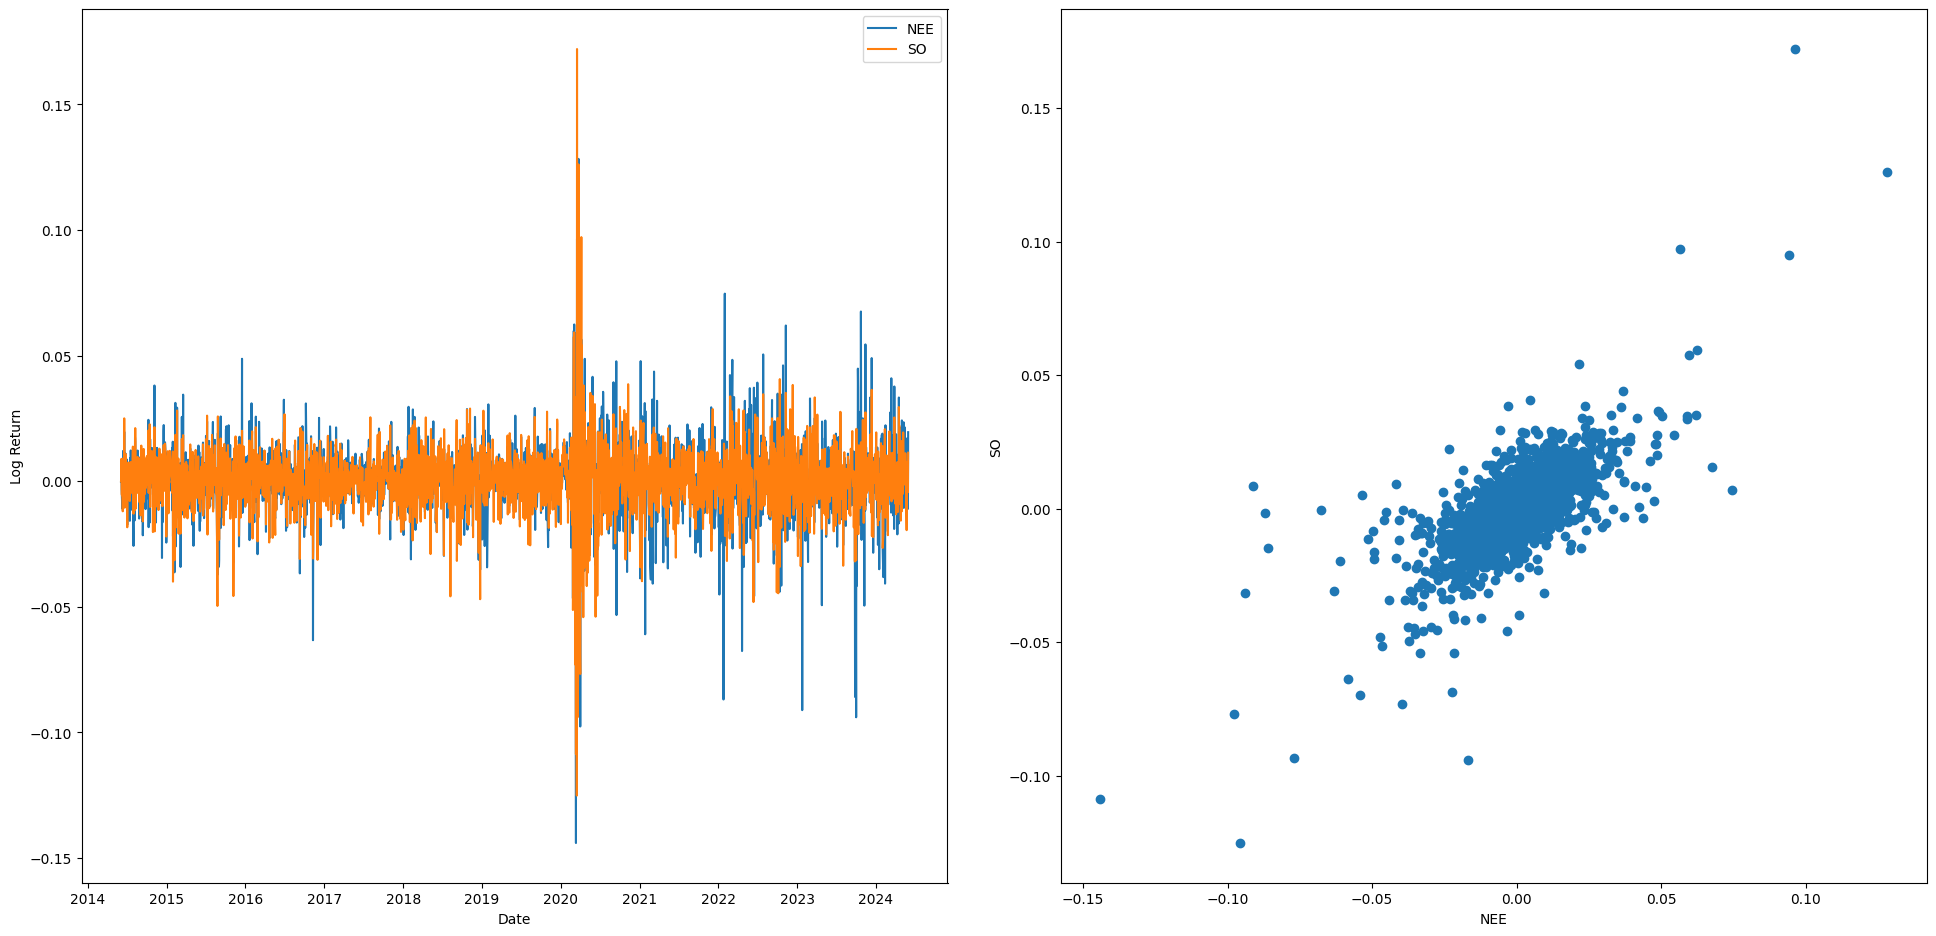

In [13]:
df = pd.DataFrame(columns=['NVDA', 'QCOM'])
sectors = {
    'Technology': ['NVDA', 'QCOM'],
    'Healthcare': ['UNH', 'LLY'],
    'Utilities': ['NEE', 'SO']
}

for sector, nstock in sectors.items():
    df = pd.DataFrame(columns=nstock)
    fig, axs = plt.subplots(1, 2, figsize=(20, 10))
    for stock in nstock:
        df[stock] = globals()[stock]['Log Return']

    print(df.corr())
    axs[0].plot(df) 
    axs[0].set_xlabel('Date')
    axs[0].set_ylabel('Log Return')
    axs[0].legend(nstock)
    axs[1].scatter(df[nstock[0]], df[nstock[1]]) 
    axs[1].set_xlabel(nstock[0])
    axs[1].set_ylabel(nstock[1])
    plt.tight_layout(pad=3.0)
    plt.show()




Calcolo del rendimento cumulato

In [14]:
print(stocks)
for stock in stocks:
    stock['Cum'] = np.cumprod(stock['Gross Return'])



[                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-06-03    0.474500    0.475000    0.465250    0.471500    0.448839   
2014-06-04    0.470250    0.475500    0.470000    0.472000    0.449315   
2014-06-05    0.472750    0.475500    0.470000    0.474000    0.451218   
2014-06-06    0.476250    0.480000    0.474500    0.475750    0.452884   
2014-06-09    0.475250    0.480750    0.472000    0.476250    0.453360   
...                ...         ...         ...         ...         ...   
2024-05-23  102.028000  106.320000  101.519997  103.799004  103.790482   
2024-05-24  104.448997  106.474998  103.000000  106.469002  106.460258   
2024-05-28  110.244003  114.939003  109.883003  113.901001  113.891647   
2024-05-29  113.050003  115.491997  110.901001  114.824997  114.815567   
2024-05-30  114.650002  115.819000  109.663002  110.500000  110.490921   

               Volume  Net Return  G

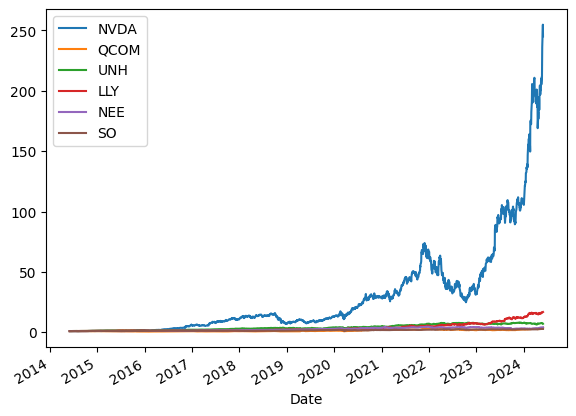

In [15]:
df = pd.DataFrame()

for i in range(6):
    df[stocks_tickets[i]] = stocks[i]['Cum']

df.plot()
plt.tight_layout(pad=3.0)
plt.show()

In [16]:
df

,NVDA,QCOM,UNH,LLY,NEE,SO
Date,,,,,,
2014-06-03,0.995776,0.999006,1.005159,0.997647,0.999794,1.000000
2014-06-04,0.996832,0.993041,1.013087,0.995461,1.001441,1.001374
2014-06-05,1.001056,0.989811,1.004153,1.001513,1.006071,1.010305
2014-06-06,1.004752,0.998758,1.005789,1.002353,1.002675,1.005038
2014-06-09,1.005808,0.993414,1.003649,1.004202,0.991768,0.999313
...,...,...,...,...,...,...
2024-05-23,230.265600,3.341733,7.580048,16.644242,3.982854,2.746923
2024-05-24,236.188665,3.484174,7.453037,16.623242,4.051068,2.767569
2024-05-28,252.675661,3.529226,7.387185,16.632095,4.099717,2.760093


Calcolo tasso composto annuo

In [17]:
delta = (end - start)/datetime.timedelta(days=1)

In [18]:
cagrs = pd.DataFrame()
cagrs.index = stocks_tickets

for i in range(len(stocks)):
    stock = stocks[i]
    cagr = (stock['Adj Close'][-1]/stock['Adj Close'][0])**(365/delta) - 1
    cagrs.loc[stocks_tickets[i], 'CAGR'] = cagr

cagrs

C:\Users\Riccardo Savio\AppData\Local\Temp\ipykernel_10872\3936899179.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cagr = (stock['Adj Close'][-1]/stock['Adj Close'][0])**(365/delta) - 1
C:\Users\Riccardo Savio\AppData\Local\Temp\ipykernel_10872\3936899179.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cagr = (stock['Adj Close'][-1]/stock['Adj Close'][0])**(365/delta) - 1


,CAGR
NVDA,0.733514
QCOM,0.130378
UNH,0.215102
LLY,0.325811
NEE,0.152396
SO,0.107535


Correlazione tra azioni dello stesso settore

In [19]:

it_df = pd.DataFrame()
it_df['NVDA'] = NVDA['Net Return']
it_df['QCOM'] = QCOM['Net Return']

print("Correlazione NVIDIA, QUALCOMM:", it_df.corr().iloc[0, 1])

hlt_df = pd.DataFrame()
hlt_df['UNH'] = UNH['Net Return']
hlt_df['LLY'] = LLY['Net Return']

print("Correlazione UnitedHealth Group, Eli Lilly and Company:", hlt_df.corr().iloc[0, 1])

ut_df = pd.DataFrame()
ut_df['NEE'] = NEE['Net Return']
ut_df['SO'] = SO['Net Return']

print("Correlazione NextEra Energy, Southern Co:", ut_df.corr().iloc[0, 1])


Correlazione NVIDIA, QUALCOMM: 0.5334764473959172
Correlazione UnitedHealth Group, Eli Lilly and Company: 0.4027768246815726
Correlazione NextEra Energy, Southern Co: 0.7166527556526477


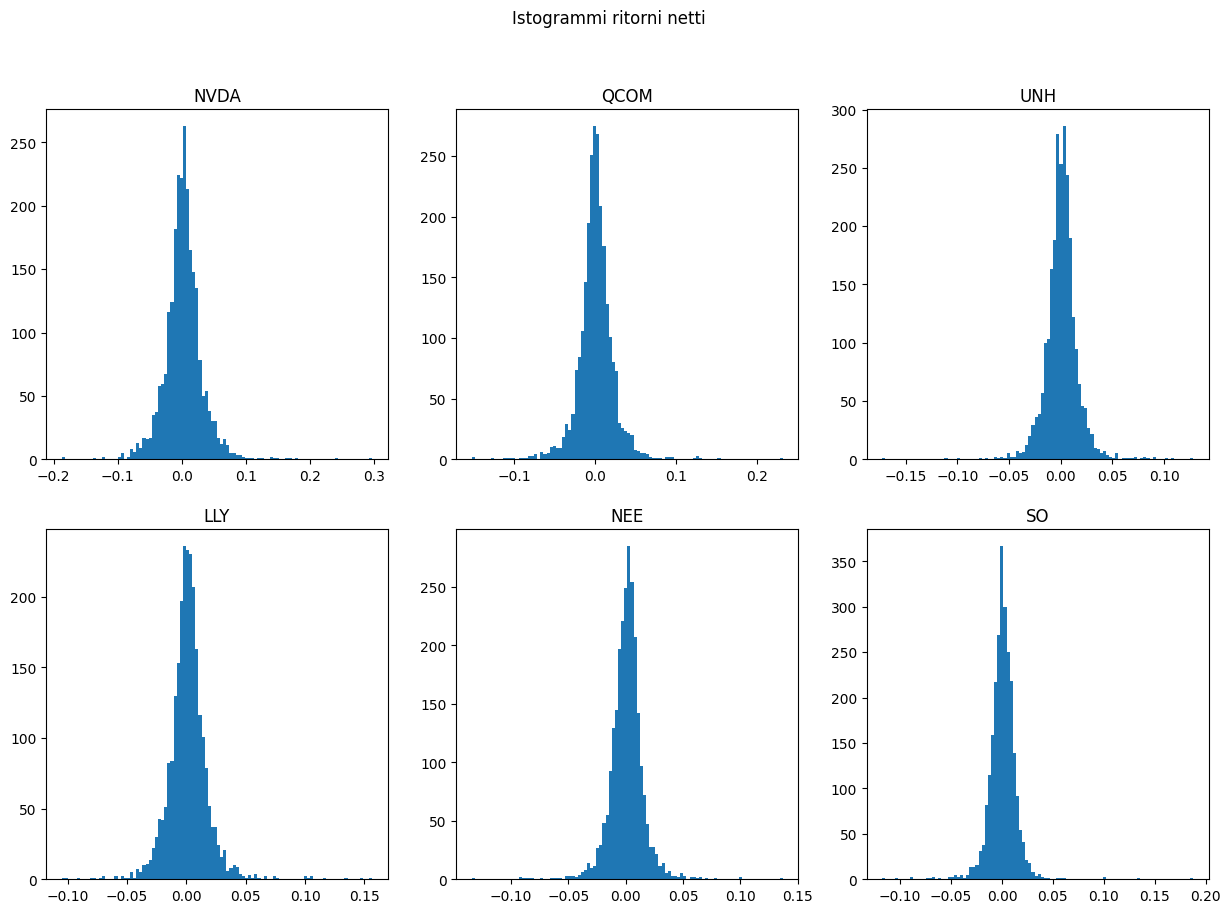

In [20]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Istogrammi ritorni netti')
for i in range(len(stocks)):
    axs[i//3, i%3].hist(stocks[i]['Net Return'], bins=100)
    axs[i//3, i%3].set_title(stocks_tickets[i])

plt.show()


    

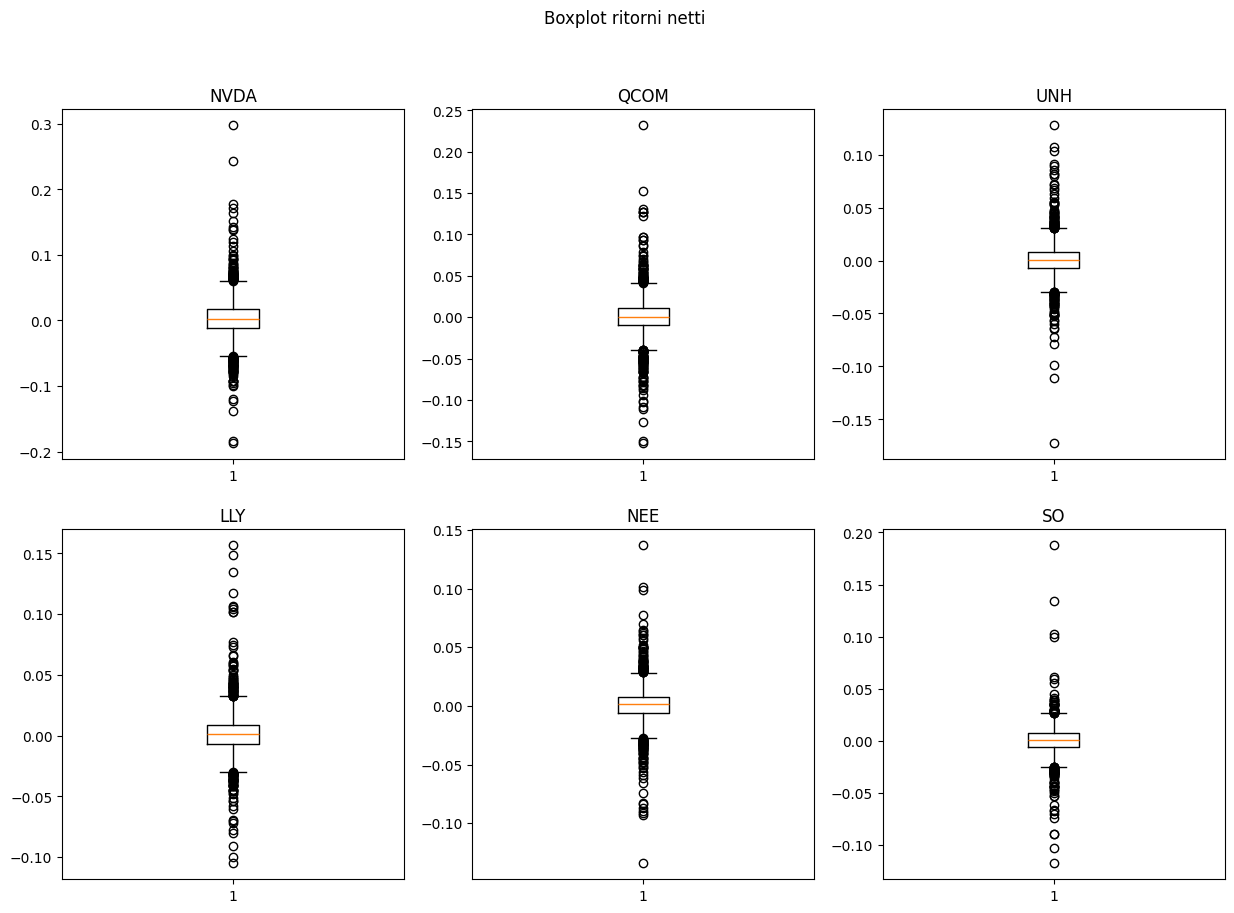

' axs[0].hist(stocks[i][\'Net Return\'], bins=100)\nstocks[i][\'Net Return\'].plot(kind=\'kde\', ax=axs[0])\naxs[0].set_title(stocks_tickets[i])\naxs[1].boxplot(stocks[i][\'Net Return\'])\naxs[1].set_title(stocks_tickets[i])\n#qq plot\nfig = plt.figure()\nax = fig.add_subplot(111)\nstats.probplot(stocks[i][\'Net Return\'], dist="norm", plot=plt)\nplt.show() '

In [21]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Boxplot ritorni netti')
for i in range(len(stocks)):
    axs[i//3, i%3].boxplot(stocks[i]['Net Return'])
    axs[i//3, i%3].set_title(stocks_tickets[i])

plt.show()



""" axs[0].hist(stocks[i]['Net Return'], bins=100)
stocks[i]['Net Return'].plot(kind='kde', ax=axs[0])
axs[0].set_title(stocks_tickets[i])
axs[1].boxplot(stocks[i]['Net Return'])
axs[1].set_title(stocks_tickets[i])
#qq plot
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(stocks[i]['Net Return'], dist="norm", plot=plt)
plt.show() """


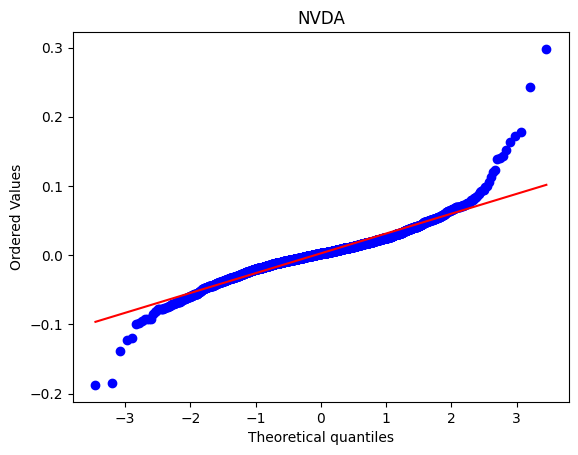

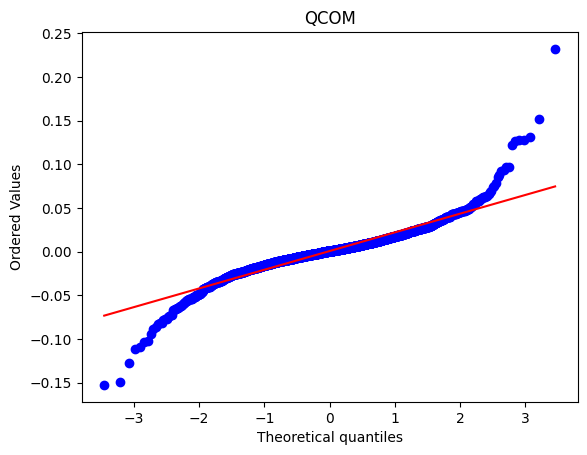

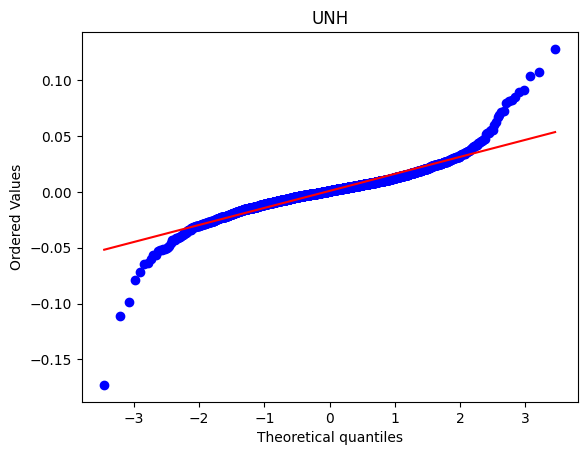

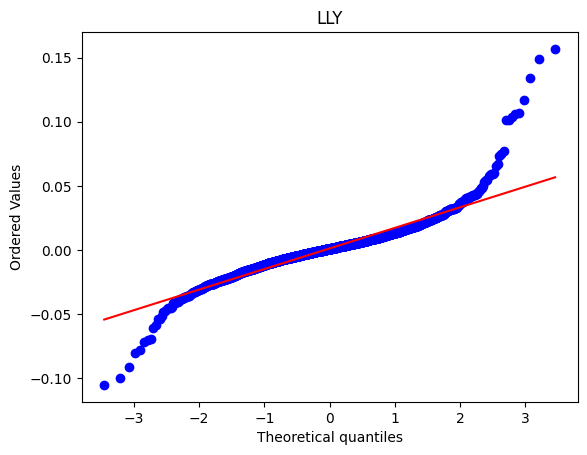

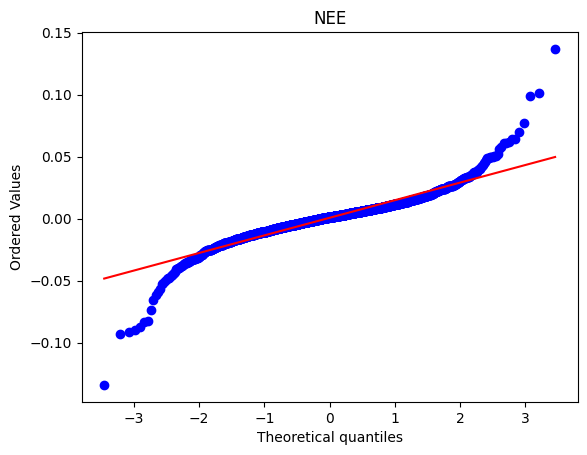

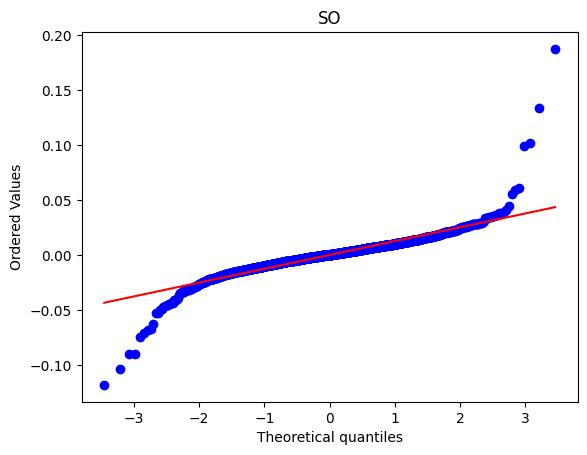

In [22]:

for i in range(len(stocks)):
    stats.probplot(stocks[i]['Net Return'], dist="norm", plot=plt)
    plt.title(stocks_tickets[i])
    plt.show()

In [23]:
df = pd.DataFrame(columns=['Mean', 'Std', 'Var', 'Kurtosis', 'Skewness'])

for i in range(len(stocks)):
    stock = stocks[i]
    df.loc[stocks_tickets[i], 'Mean'] = stock['Net Return'].mean()
    df.loc[stocks_tickets[i], 'Std'] = stock['Net Return'].std()
    df.loc[stocks_tickets[i], 'Var'] = stock['Net Return'].var()
    df.loc[stocks_tickets[i], 'Kurtosis'] = stock['Net Return'].kurtosis()
    df.loc[stocks_tickets[i], 'Skewness'] = stock['Net Return'].skew()

df

,Mean,Std,Var,Kurtosis,Skewness
NVDA,0.002629,0.029824,0.000889,9.271245,0.690361
QCOM,0.000741,0.022573,0.00051,10.717762,0.361689
UNH,0.000907,0.016104,0.000259,12.497812,-0.03387
LLY,0.001265,0.017044,0.000291,12.138007,1.05598
NEE,0.000677,0.015007,0.000225,11.182581,-0.176153
SO,0.000499,0.013659,0.000187,26.142657,0.703059


In [24]:
df = pd.DataFrame(columns=stocks_tickets)

for i in range(len(stocks)):
    stock = stocks[i]
    df[stocks_tickets[i]] = stock['Net Return']

In [25]:
df.corr()

,NVDA,QCOM,UNH,LLY,NEE,SO
NVDA,1.000000,0.533476,0.297084,0.225851,0.230257,0.150062
QCOM,0.533476,1.000000,0.304316,0.205931,0.252794,0.203065
UNH,0.297084,0.304316,1.000000,0.402777,0.355012,0.380180
LLY,0.225851,0.205931,0.402777,1.000000,0.289630,0.317735
NEE,0.230257,0.252794,0.355012,0.289630,1.000000,0.716653
SO,0.150062,0.203065,0.380180,0.317735,0.716653,1.000000


In [26]:
df.cov()

,NVDA,QCOM,UNH,LLY,NEE,SO
NVDA,0.000889,0.000359,0.000143,0.000115,0.000103,0.000061
QCOM,0.000359,0.000510,0.000111,0.000079,0.000086,0.000063
UNH,0.000143,0.000111,0.000259,0.000111,0.000086,0.000084
LLY,0.000115,0.000079,0.000111,0.000291,0.000074,0.000074
NEE,0.000103,0.000086,0.000086,0.000074,0.000225,0.000147
SO,0.000061,0.000063,0.000084,0.000074,0.000147,0.000187


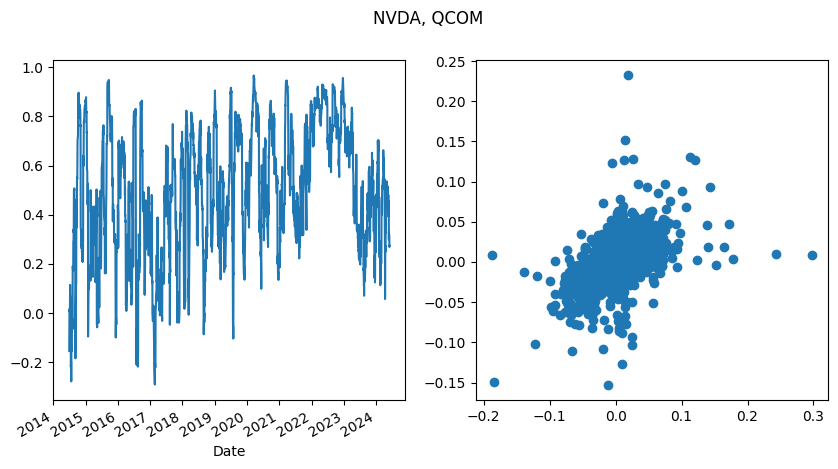

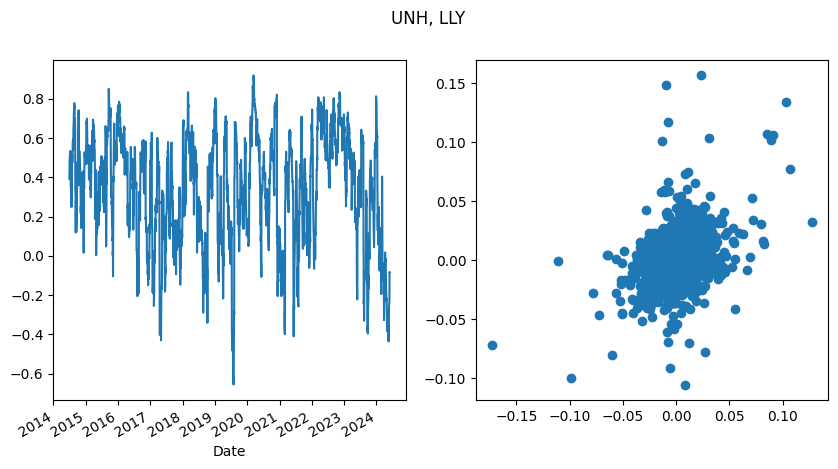

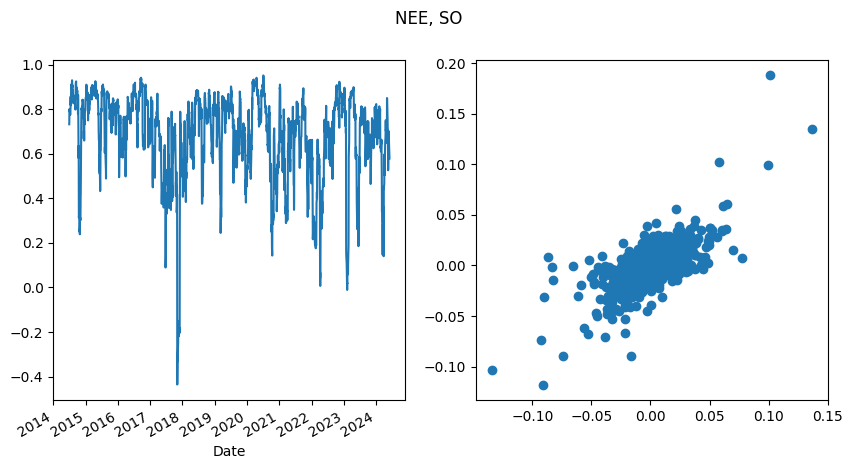

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
rolling_corr = NVDA['Net Return'].rolling(window=20).corr(QCOM['Net Return'])
rolling_corr.plot(ax=axs[0])
axs[1].scatter(NVDA['Net Return'], QCOM['Net Return'])
plt.suptitle('NVDA, QCOM')
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
rolling_corr = UNH['Net Return'].rolling(window=20).corr(LLY['Net Return'])
rolling_corr.plot(ax=axs[0])
axs[1].scatter(UNH['Net Return'], LLY['Net Return'])
plt.suptitle('UNH, LLY')
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
rolling_corr = NEE['Net Return'].rolling(window=20).corr(SO['Net Return'])
rolling_corr.plot(ax=axs[0])
axs[1].scatter(NEE['Net Return'], SO['Net Return'])
plt.suptitle('NEE, SO')
plt.show()


c:\Users\Riccardo Savio\Documents\my-project\Progetto-BISF\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Riccardo Savio\Documents\my-project\Progetto-BISF\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Riccardo Savio\Documents\my-project\Progetto-BISF\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


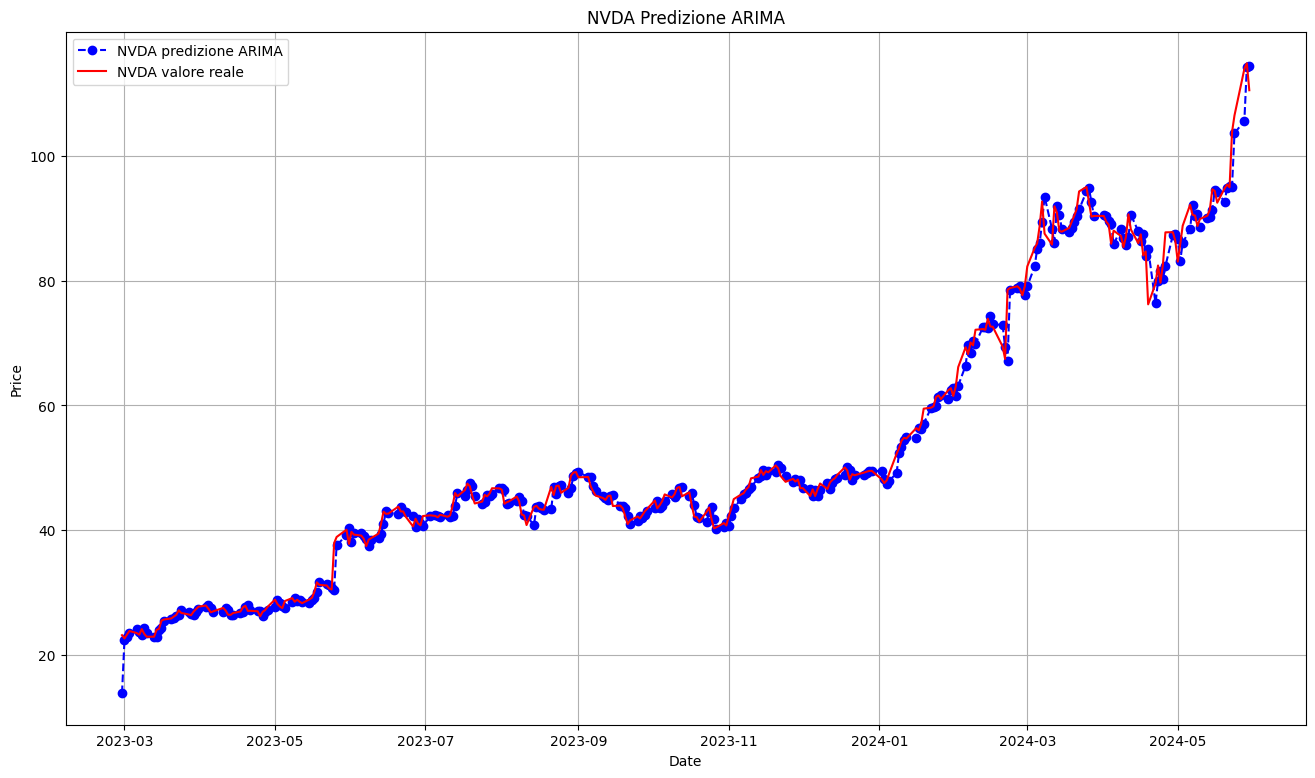

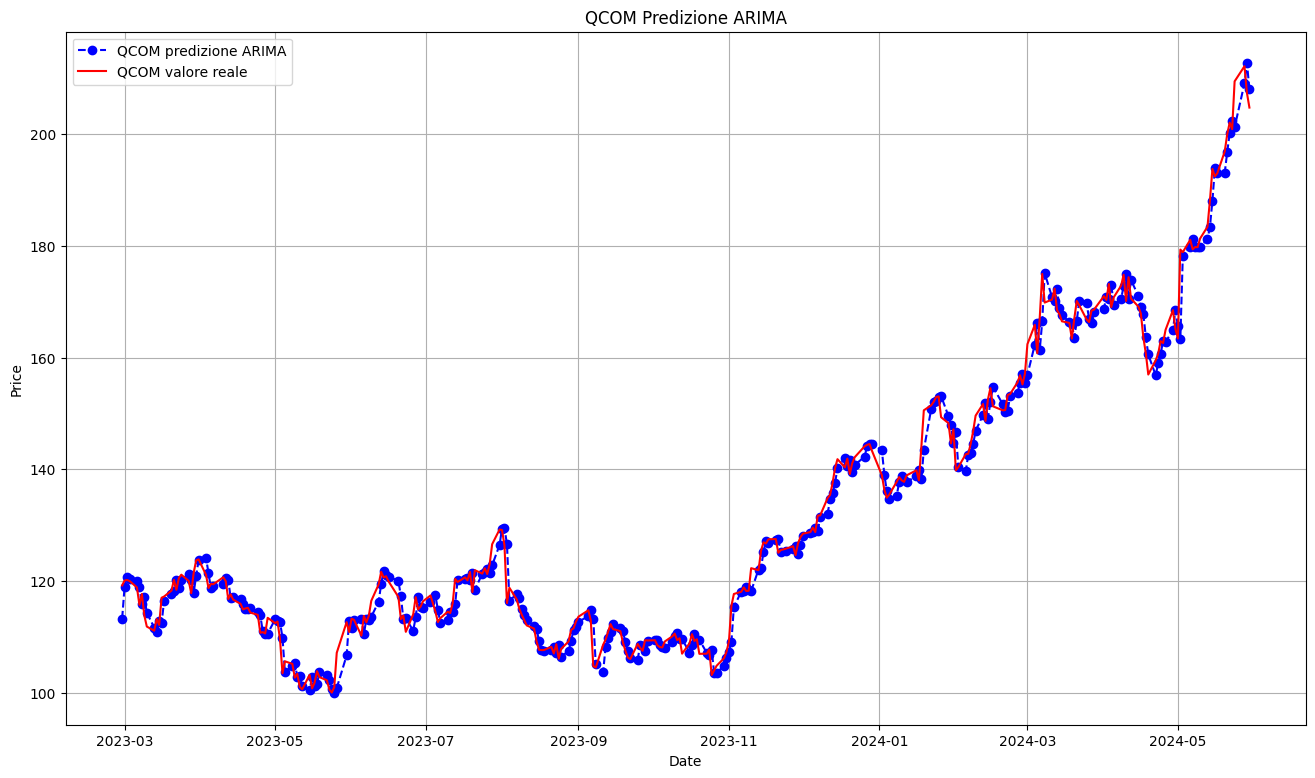

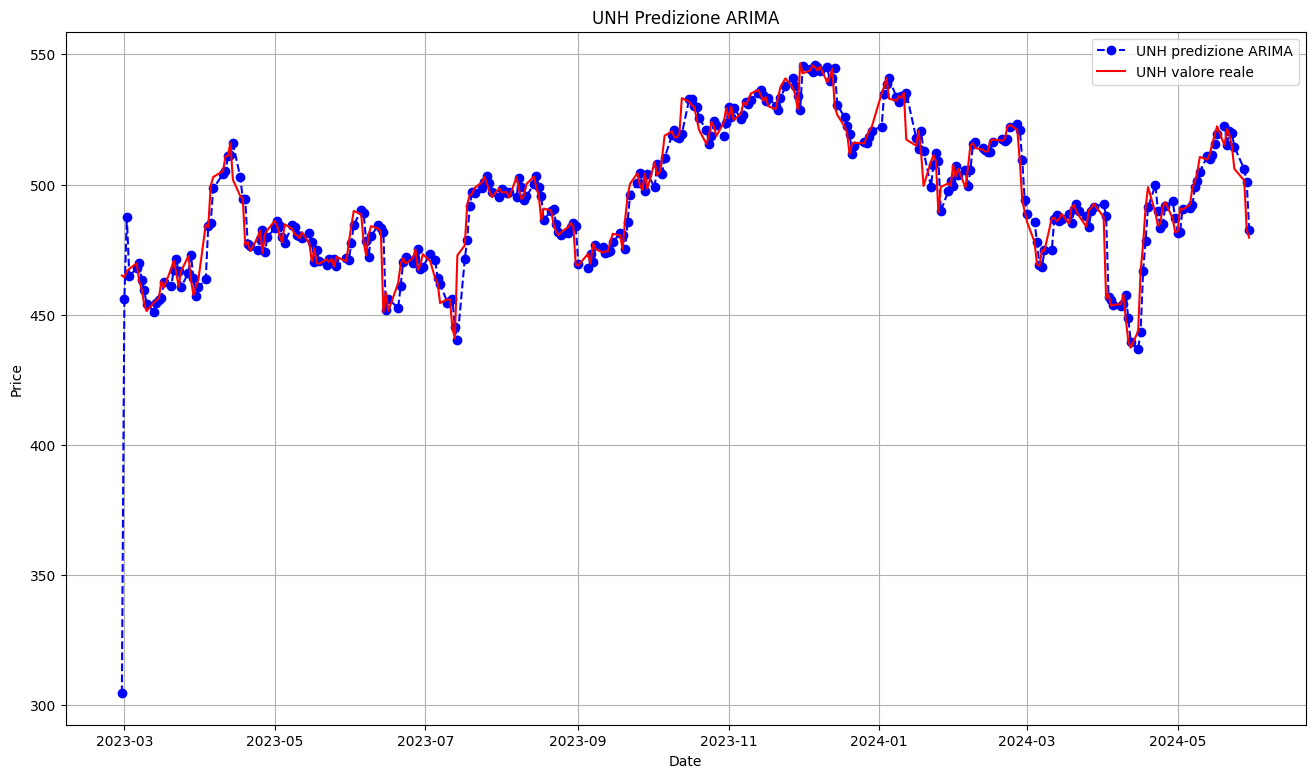

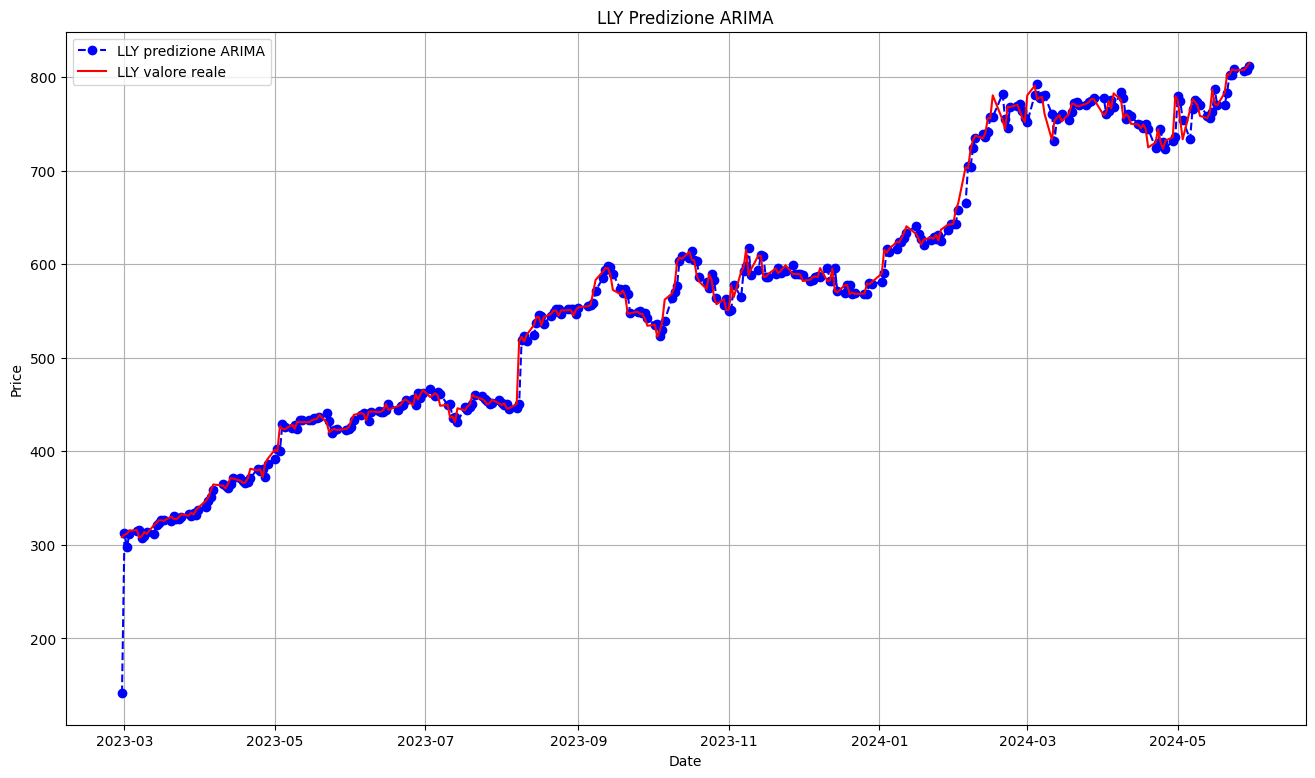

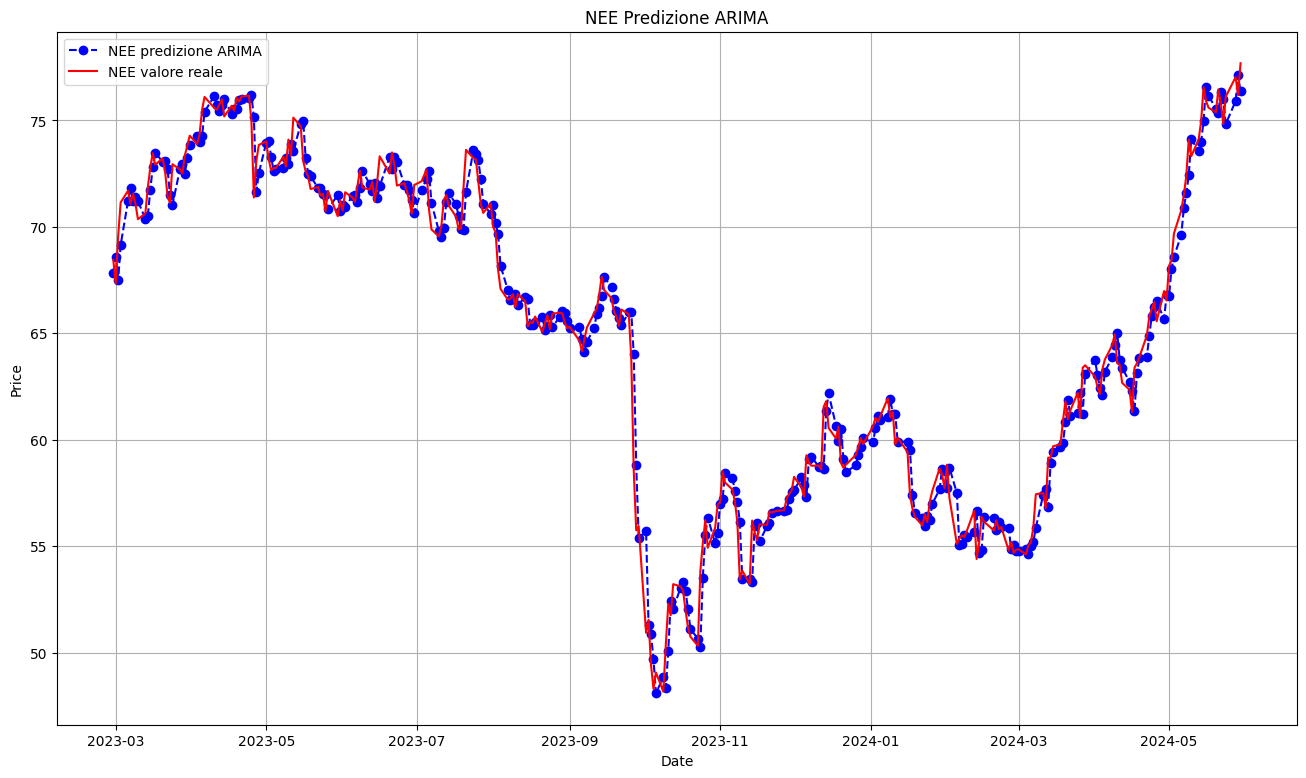

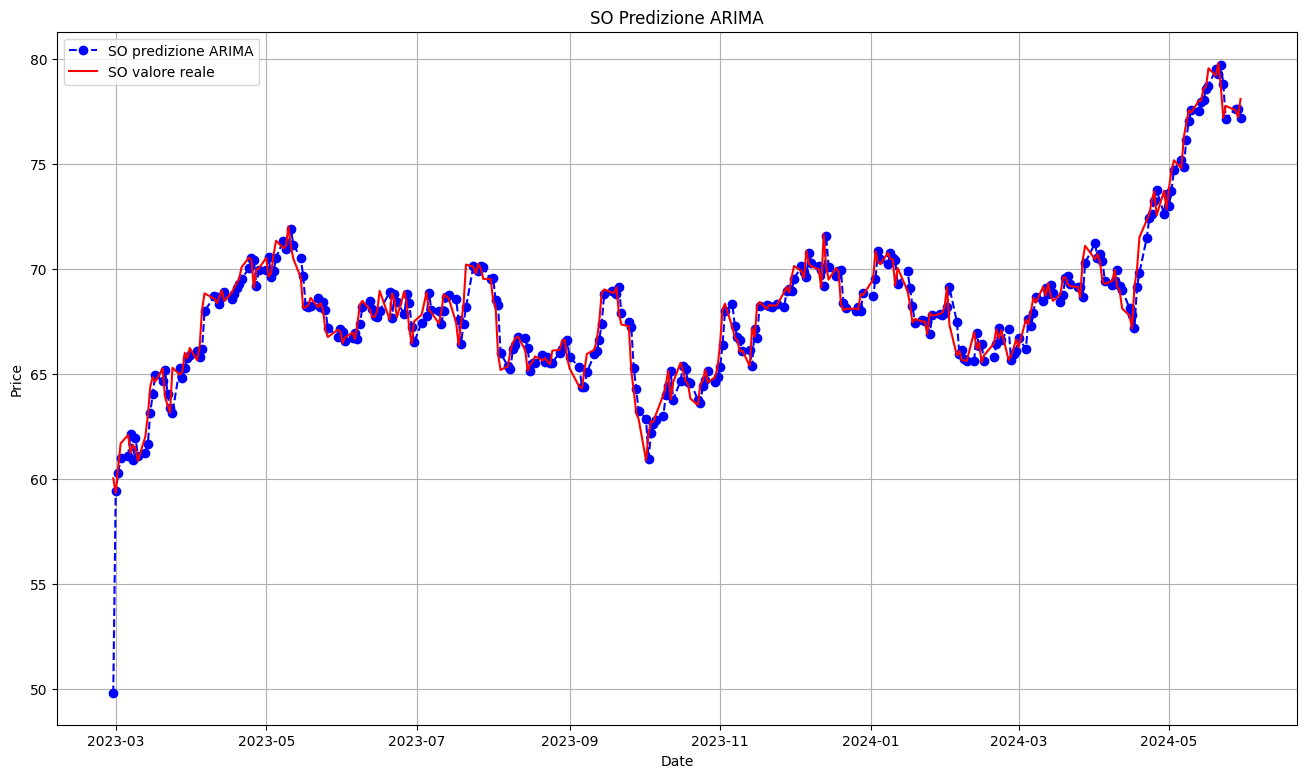

In [33]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA


for i in range(len(stocks)):
    #get all rows where date is lower than 2021-01-31
    days = stocks[i].shape[0]
    day_per_month = days//120

    training_set = stocks[i][:day_per_month*80]['Adj Close']
    validation_set = stocks[i][day_per_month*80:day_per_month*110]['Adj Close']
    test_set = stocks[i][day_per_month*110:]['Adj Close']

    training_data = np.array(training_set)
    testing_data = np.array(test_set)

    # Initialize the list for storing predictions
    model_predictions = []

    # Fit the ARIMA model on the initial training data
    model = ARIMA(training_data, order=(2, 1, 1))
    model_fit = model.fit()

    for j in range(len(testing_data)):
        # Forecast the next value
        output = model_fit.forecast(steps=1)
        yhat = output[0]
        model_predictions.append(yhat)
        
        # Get the actual test value
        actual_test_value = testing_data[j]
        
        # Append the actual value to the training data
        training_data = np.append(training_data, actual_test_value)
        
        # Refit the model with the updated training data
        model = ARIMA(training_data, order=(2, 1, 1))
        model_fit = model.fit()

    # Convert the model predictions to a numpy array for further analysis if needed
    model_predictions = np.array(model_predictions)

    plt.figure(figsize=(16,9))
    plt.grid(True)
    date_range = stocks[i][day_per_month*110:].index
    plt.plot(date_range, model_predictions, color = 'blue', marker = 'o', linestyle = 'dashed', label = f'{stocks_tickets[i]} predizione ARIMA')
    plt.plot(date_range, testing_data, color = 'red', label = f'{stocks_tickets[i]} valore reale' )
    plt.title(stocks_tickets[i] + ' Predizione ARIMA')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()